# Challenge 1 : Introduction aux circuits quantiques

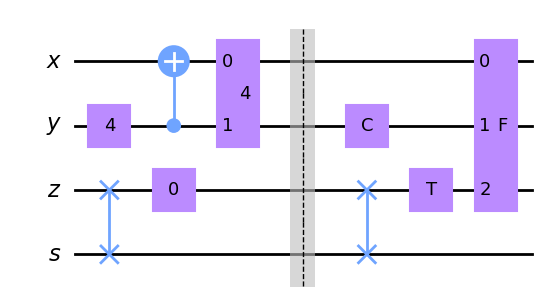

In [1]:
from machinerie import Circuit, draw404
from math import pi

draw404()

## Introduction aux outils

_Si le mot qubit vous donne le vertige, je vous invite à prendre cinq minutes pour regarder une introduction aux ordinateur quantiques, par exemple : <https://youtu.be/bayTbt_8aNc>. Cependant, pas d'inquiétude, le doctorat en phyisque n'est pas nécessaire pour résoudre ces challenges, les notions nécessaires seront rapidement expliquées._

### Représentation
Le qubit, noté $|x\rangle$, peut prendre la valeur de 0: $|0\rangle$, 1: $|1\rangle$, mais aussi toute superposition: $\alpha |0\rangle + \beta |1\rangle$, avec $|\alpha|^2 + |\beta|^2 = 1$, ce qui va nous permettre, entre autre, de faire plusieurs opérations en même temps. 

On peut le représenter sous plusieurs formes, par exemple, en utilisant une sphère de Bloch: 

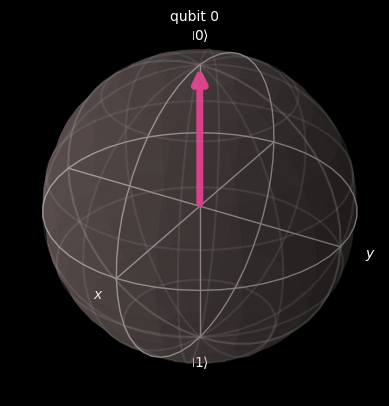

In [2]:
qc = Circuit(1)
qc.draw_qubits("bloch")

Pour facilier les choses, nous allons dans cette suite de challenges uniquement manipuler des circuits. Pour représenter le qubit $|0\rangle$, on utilise donc un circuit vide à 1 qubit: `Circuit(1)`. 

Pour créer l'état $|1\rangle$, on peut appliquer une porte _NOT_: 

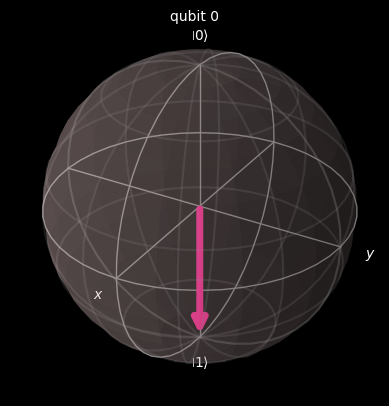

In [3]:
qc = Circuit(1)
qc.x(0)
qc.draw_qubits("bloch")

Plus généralement, utiliser la porte `u` de qiskit permet de créer n'importe quel état. 

![sphère de Bloch sur wikipédia](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bloch_sphere.svg/250px-Bloch_sphere.svg.png)

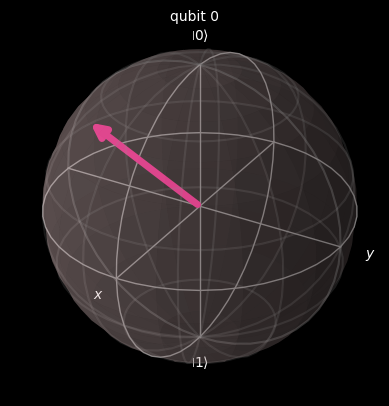

In [4]:
qc = Circuit(1)
qc.u(theta=pi / 4, phi=-pi / 4, lam=0, qubit=0)
qc.draw_qubits("bloch")

Qiskit permet aussi un rendu Latex:

In [5]:
qc = Circuit(1)
qc.h(0)
qc.draw_qubits()

<IPython.core.display.Latex object>

Une autre façon d'écrire nos qubits est d'utiliser des vecteurs. Par exemple, pour la base canonique:
$$
    |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \space 
    |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}  
$$
Dans ce cas là, le qubit précédent s'écrit: 
$$
    \frac{\sqrt{2}}{2} |0\rangle + \frac{\sqrt{2}}{2} |1\rangle =  \frac{\sqrt{2}}{2} \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

### Mesure

L'action de mesure sur le qubit le sort de son état quantique, il s'effondre <_<, il ne peut prendre qu'une valeur classique, 0 ou 1. Dans le cas des qubits $|0\rangle$ et $|1\rangle$, lors d'une mesure, ils donneront toujours 0, et 1. Mais quid des qubits en superposition ? Pour un qubit en superposition, la mesure est probabiliste. Pour un qubit $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$, les probabilités de mesure sont données par: 

$$
    \Pr(0) = \left|\alpha\right|^2, \space \Pr(1) = \left|\beta\right|^2  
$$

Dans le cas de $|\psi\rangle = \frac{\sqrt{2}}{2} |0\rangle + \frac{\sqrt{2}}{2} |1\rangle$, la probabilité d'obtenir 0 ou 1 est la même, $\frac{1}{2}$!

In [6]:
qc = Circuit(1)
qc.h(0)
qc.draw_qubits()

<IPython.core.display.Latex object>

In [7]:
qc.get_measure(shots=1000, normalise=False)

{'0': 505, '1': 495}

### Systèmes multiples

De même, plusieurs qubits peuvent s'écrire avec des brakets, ou avec des vecteurs: 
$$
    |\psi\rangle = \alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle + \beta |11\rangle
$$

$$
    |00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}, \space 
    |01\rangle = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}, \space 
    |10\rangle = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}, \space  
    |11\rangle = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}  
$$

Pour combiner des qubits, on utilise l'opération $\otimes$:
$$
|00\rangle = |0\rangle \otimes |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}\otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix}
1 \times \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ 
0 \times \begin{pmatrix} 1 \\ 0 \end{pmatrix} 
\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0  \end{pmatrix}
$$

En pratique cela donne: 

In [8]:
qc = Circuit(2)  # Circuit à 2 qubits
qc.h(0)  # On applique une porte H au 1er qubit
qc.draw_qubits()

<IPython.core.display.Latex object>

Attendez une seconde, n'aurait-on pas dû obtenir $\left(\frac{\sqrt{2}}{2} |0\rangle + \frac{\sqrt{2}}{2} |1\rangle \right) \otimes |0\rangle = \frac{\sqrt{2}}{2} |00\rangle + \frac{\sqrt{2}}{2} |10\rangle$? 

Cela est dû à qiskit, l'ordre est inversé, le qubit 0, celui en haut du circuit, est représenté en dernier. L'opération précédente était en fait $|0\rangle \otimes \left(\frac{\sqrt{2}}{2} |0\rangle + \frac{\sqrt{2}}{2} |1\rangle \right)$, ce qui donne bien le résultat obtenu en pratique: $\frac{\sqrt{2}}{2} |00\rangle + \frac{\sqrt{2}}{2} |01\rangle$, ouf. 

### Portes simples

Les portes peuvent être représentés par des matrices unitaires, que l'on applique sur nos états quantiques: 
$$
|\psi_{\text{out}}\rangle = U|\psi_{\text{in}}\rangle
$$

Par exemple, la porte quantique _NOT_, notée $X$, qui reproduit le même comportement que son équivalent classique:
$$
    X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, 
$$
$$
    X|0\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle, 
$$
$$
    X|1\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle
$$

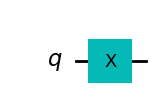

In [4]:
qc = Circuit(1)
qc.x(0)
qc.draw_circuit()

Nous avons aussi vu la porte $H$, c'est la porte de Hadamard, elle permet de créer des états superposés: 
$$
    H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix},  
$$
$$
    H|0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix},  
$$
$$
    H|1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} 
$$

Ce qui peut se décomposer selon la base canonique, pour voir le lien entre la notation braket et la notation matricielle: 
$$
H|0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \frac{1}{\sqrt{2}} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}|1\rangle
$$


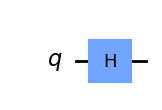

In [3]:
qc = Circuit(1)
qc.h(0)
qc.draw_circuit()

Pour se déplacer sur la sphère de Bloch, on peut utiliser les portes $RX$, $RY$ et $RZ$. Elles sont définies par: 

$$
R_X(\theta) = \begin{pmatrix}
\cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\
-i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{pmatrix},
\space

R_Y(\theta) = \begin{pmatrix}
\cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{pmatrix},
\space

R_Z(\theta) = \begin{pmatrix}
e^{-i\frac{\theta}{2}} & 0 \\
0 & e^{i\frac{\theta}{2}}
\end{pmatrix}
$$

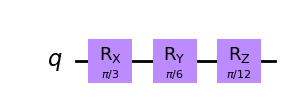

In [11]:
qc = Circuit(1)
qc.rx(theta=pi / 3, qubit=0)
qc.ry(pi / 6, 0)
qc.rz(pi / 12, 0)
qc.draw_circuit()

Ces notations permettent facilement d'appliquer des portes à un qubit, sur un qubit, mais qu'en est-il des états à plusieurs qubits ? Pour appliquer des portes simples dans des systèmes multiples, il faut utiliser le produit tensoriel. Par exemple, dans un système à deux qubits, appliquer la porte $H$ sur le premier qubit uniquement est équivalent à appliquer $H$ sur le premier qubit, et l'identité sur le second. Cela nous permet de créer une porte de la bonne taille: 
$$
    H \otimes I = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1& -1\end{pmatrix} \otimes \begin{pmatrix} 1&0 \\ 0& 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\times\begin{pmatrix} 1&0 \\ 0& 1 \end{pmatrix}&1\times\begin{pmatrix} 1&0 \\ 0& 1 \end{pmatrix}\\1\times\begin{pmatrix} 1&0 \\ 0& 1 \end{pmatrix}&-1\times\begin{pmatrix} 1&0 \\ 0& 1 \end{pmatrix} \end{pmatrix}= \frac{1}{\sqrt{2}}\begin{pmatrix} 1&0&1&0\\0&1&0&1\\1&0&-1&0\\0&1&0&-1\end{pmatrix}
$$  

Ce qui nous permet de l'utiliser sur notre système multiple. Par exemple, pour l'appliquer sur $|01\rangle$:
$$
    (H \otimes I) |01\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1&0&1&0\\0&1&0&1\\1&0&-1&0\\0&1&0&-1\end{pmatrix} \begin{pmatrix} 0\\1\\0\\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 0\\1\\0\\1\end{pmatrix} = \frac{1}{\sqrt{2}} |01\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

La notation avec des brakets permet aussi de rester sur un seul qubit à la fois. Pour appliquer $H$ au premier qubit uniquement: 
$$
    (H|0\rangle) \otimes |1\rangle = \left(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle = \frac{1}{\sqrt{2}} |01\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

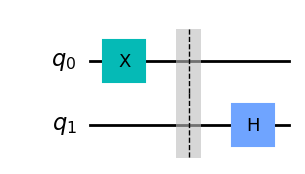

In [12]:
qc = Circuit(2)

# Préparation de l'état |01>
qc.x(0)
qc.barrier()

# La barrière n'a pas d'impact sur le circuit (ici), je l'utiliserai pour améliorer la lisibilité des circuits.

# On applique ensuite H
qc.h(1)
qc.draw_circuit()

In [13]:
qc.draw_qubits()

<IPython.core.display.Latex object>

### Portes multiples

Une porte qui va beaucoup nous intéresser par la suite est la _CNOT_, ou _controlled-NOT_. C'est elle qui va permettre d'intriquer des qubits ! Elle agit sur une paire de qubit, si le premier est à 0 (qubit de contrôle), il ne se passe rien, par contre si le premier est à 1, le deuxième est inversé, il passe par une porte _NOT_. Elle est définie par : 

$$
\text{CNOT} = \begin{pmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{pmatrix}
$$
Ou encore : 
$$
\text{CNOT} = 
\begin{cases}
    |00 \rangle \xrightarrow[]{I \otimes I} |00 \rangle \\
    |01 \rangle \xrightarrow[]{I \otimes I} |01 \rangle \\
    |10 \rangle \xrightarrow[]{I \otimes NOT} |11 \rangle \\
    |11 \rangle \xrightarrow[]{I \otimes NOT} |10 \rangle 
\end{cases}
$$

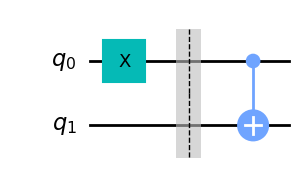

In [14]:
qc = Circuit(2)

qc.x(0)
qc.barrier()

qc.cx(0, 1)  # Le qubit de contrôle est 0, celui qui va être inversé est 1
qc.draw_circuit()

In [15]:
qc.draw_qubits()

<IPython.core.display.Latex object>

Dans le cas de qubits en superposition, j'utilise la notation avec braket qui permet de voir facilement le résultat: 

$$
   \text{CNOT} \left(\frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |10\rangle \right)  = \frac{1}{\sqrt{2}} \text{CNOT} |00\rangle + \frac{1}{\sqrt{2}} \text{CNOT} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

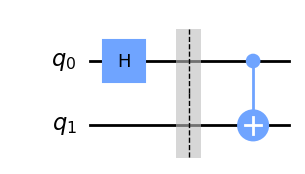

In [16]:
qc = Circuit(2)

qc.h(0)
qc.barrier()

qc.cx(0, 1)
qc.draw_circuit()

In [17]:
qc.draw_qubits()

<IPython.core.display.Latex object>

### Un dernier point pour la route : opérations avec les bra-kets et décomposition spectrale

Sans rentrer dans les détails, la forme des brakets a une utilité autre que nous rallentir à l'écriture : elle sert à représenter les opérations usuelles de manière visuelle.

Par exemple, un produit scalaire (complexe) : $u^\dagger v$, peut s'écrire : 
$$
    \langle u | v \rangle
$$

De la même manière, le produit : $u v^\dagger$ s'écrit : 
$$
    | u \rangle \langle v |
$$

Exemple d'écriture matricielle:
$$
   | 1 \rangle \langle 0 | = \begin{pmatrix} 0 &0\\ 1&0\end{pmatrix}
$$

Exemple d'opération:
$$
  ( | 1 \rangle \langle 0 | )   (| 0 \rangle + |1\rangle) =   | 1 \rangle \langle 0 |  0 \rangle + | 1 \rangle \langle 0 |1\rangle =   | 1 \rangle \cdot 1 + | 1\rangle \cdot 0 = |1\rangle 
$$


Cette notation vas nous être utile pour décomposer nos portes. Commes toutes les portes sont des matrices unitaires, elles satisfont:
$$
    UU^\dagger = I = U^\dagger U
$$

Le théorème spectral nous donne donc une base orthonormale de dimension $N$: $\{|\psi_1\rangle, \ldots, |\psi_N\rangle\}$, avec les vecteurs propres $\lambda_1, \ldots, \lambda_N$ such that $U = \lambda_1 |\psi_1\rangle\langle\psi_1| + \cdots + \lambda_N |\psi_N\rangle\langle\psi_N|$.

Ou encore
$$
    U = \sum_{k=1}^N \lambda_k |\psi_k\rangle\langle\psi_k| \tag{1}
$$

Par exemple pour l'identité: 

$$I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} =  |0\rangle \langle 0| |1\rangle \langle 1|$$


### Note (non nécessaire) sur l'intrication

Une propriété très intéressante des qubits est qu'ils peuvent être séparés, mais aussi **intriqués**, c'est-à-dire qu'ils sont dépendants les uns des autres. Cela permet, par exemple, d'agir sur un qubit et d'obtenir des informations sur le second.

Si l'on prend l'état intriqué $|\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, et que l'on mesure le premier qubit, on a 50% de chance d'obtenir $0$ et 50% d'obtenir $1$. Cependant, en mesurant uniquement le premier qubit, l'état du second est entièrement déterminé sans qu'il soit mesuré ! En effet, si l'on mesure $0$ pour le premier qubit, alors le second est nécessairement aussi $0$. Attention, comme la mesure du premier qubit est aléatoire, cela ne permet pas de téléporter des informations à une vitesse supérieure à celle de la lumière, car dans l'autre perspective, on ne connaît pas l'état de la mesure (avant de recevoir l'information par un canal classique, par exemple).

Un contre-exemple est l'état $|\psi\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. La mesure du premier qubit ne donne aucune information sur le second ; les deux qubits sont **indépendants** ou **séparables**.

## À vous de jouer !

_Vous n'aurez besoin uniquement des portes présentées au dessus: $X$, $H$, $RX$, $RY$, $RZ$, $CNOT$, cependant, toute la librairie est disponible (l'API de vérification accepte n'importe quel `Circuit` de bonne taille)._

### Partie 1: Rotation

On a vu que l'état $H|0\rangle$ a une probabilité $\frac{1}{2}$ de donner 0, et $\frac{1}{2}$ de donner 1. On peut en réalité trouver un état pour n'importe couple de probabilité donné. 

Trouvez un état $|\psi\rangle$ ayant une probabilité $\frac{1}{4}$ de donner 0, et $\frac{3}{4}$ de donner 1. 

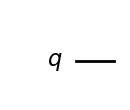

In [6]:
p1 = Circuit(1)
p1.draw_circuit()

In [7]:
p1_input = Circuit(1)

p1_input.x(0)
p1_input.rx(pi / 3, 0)
p1_input.get_measure()

{'0': 0.2470703125, '1': 0.7529296875}

In [8]:
p1.compose(p1_input, front=True, inplace=True)  # oui, inutile ici
print(p1.get_measure(shots=10000))
print("{'1': ~0.75, '0': ~0.25}")

{'0': 0.2521, '1': 0.7479}
{'1': ~0.75, '0': ~0.25}


### Partie 2: Vecteurs propres

Pour l'opération _NOT_, un vecteur propre est l'état $|+\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$, associé à la valeur propre $1$: $X |+\rangle = |+\rangle$. L'état $|+\rangle$ peut se construire avec une porte de Hadamard: $H|0\rangle = |+\rangle$.

Trouvez un vecteur propre de $\text{CNOT}(I\oplus H)$, représenté en circuit ci-dessous : 

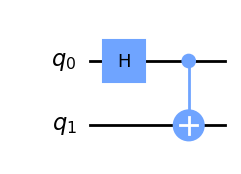

In [9]:
p2 = Circuit(2)
p2.h(0)
p2.cx(0, 1)
p2.draw_circuit()

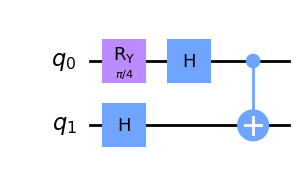

In [10]:
p2_input = Circuit(2)

p2_input.ry(pi / 4, 0)
p2_input.h(1)

p2.compose(p2_input, front=True, inplace=True)
p2.draw_circuit()

In [12]:
# Vérification
print(f"""
    {p2_input.get_measure()}
~=
    {p2.get_measure()}
""")


    {'10': 0.4267578125, '00': 0.4130859375, '11': 0.0771484375, '01': 0.0830078125}
~=
    {'00': 0.462890625, '10': 0.40625, '01': 0.0615234375, '11': 0.0693359375}



## Récupération du drapeau ! 

Pour valider vos circuits `p1_input` et `p2_input`, il faut me les envoyer sous forme _flat_, à l'adresse donée dans l'énoncée. Le code suivant devrait se charger des détails. **Vérifiez l'URL**.

Le brute force est interdit, vous avez des tests pour vérifier de votre côté. Cependant, même avec $10000$ _shots_, il se peut que vous soyez très malchanceux, dans ce cas là, n'hésitez pas à réessayer une ou deux fois. Si le problème persiste, que vous pensez avoir juste et que c'est l'API qui est cassé, ce qui est tout à fait possible, venez me voir en DM sur discord : @sckathach, ou Le magicien quantique. 

In [26]:
import requests
import json

data = {
    "p1_input": p1_input.get_flat_unitary(),
    "p2_input": p2_input.get_flat_unitary(),
}

url = "https://causapscal-des-profondeurs.404ctf.fr/challenges/1"
headers = {"Content-Type": "application/json", "Accept": "application/json"}
response = requests.post(url, json=data, headers=headers)

print(json.loads(response.content)["message"])

GG ! Voici le drapeau : 404CTF{uN3_SUp3rp0s1tIon_d3_dr4pE4ux_PoUr_1_m3l4nGE_ExPl0S1f}
